In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# allows plots to be rendered directly inside the notebook
%matplotlib inline

## Univariate Plots

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

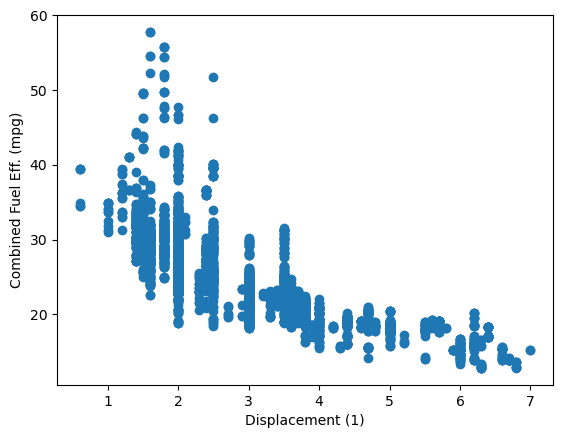

In [2]:
fuel_econ = pd.read_csv('Data/fuel-econ.csv')
fuel_econ.head(10)

# Scatter plot
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

* the relationship between the two variables is negative because as higher values of the x-axis variable are increasing, the values of the variable plotted on the y-axis are decreasing.

### seaborn.regplot() : 
* Seaborn's regplot() function combines scatterplot creation with regression function fitting

### Seaborn's regplot() function combines scatterplot creation with regression function fitting

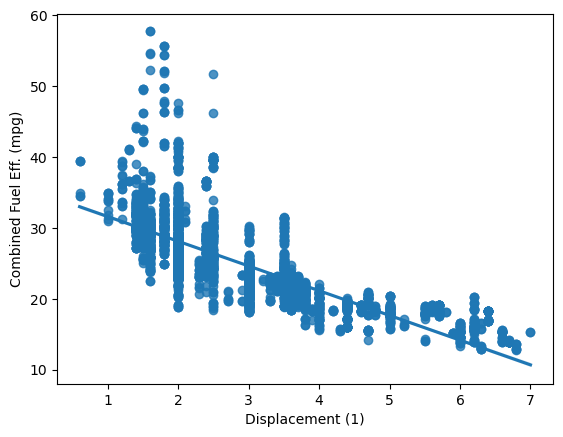

In [3]:
sns.regplot(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

### Plot the regression line on the transformed data

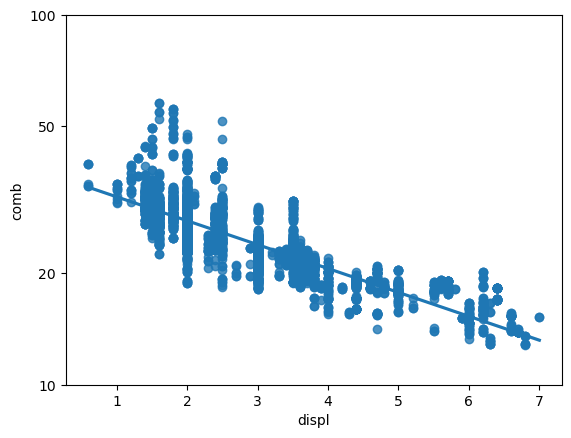

In [4]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
comb =fuel_econ['comb'].apply(log_trans)
sns.regplot(data = fuel_econ, x = 'displ',  y =comb)
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

## Overplotting, Transparency, and Jitter

* Let's see an example below for each **Jitter** to move the position of each point slightly from its true value. Jitter is not a direct option in matplotlib's **scatter()** function, but is a built-in option with seaborn's regplot() function. The x- and y- jitter can be added independently, and won't affect the fit of any regression function, if made.

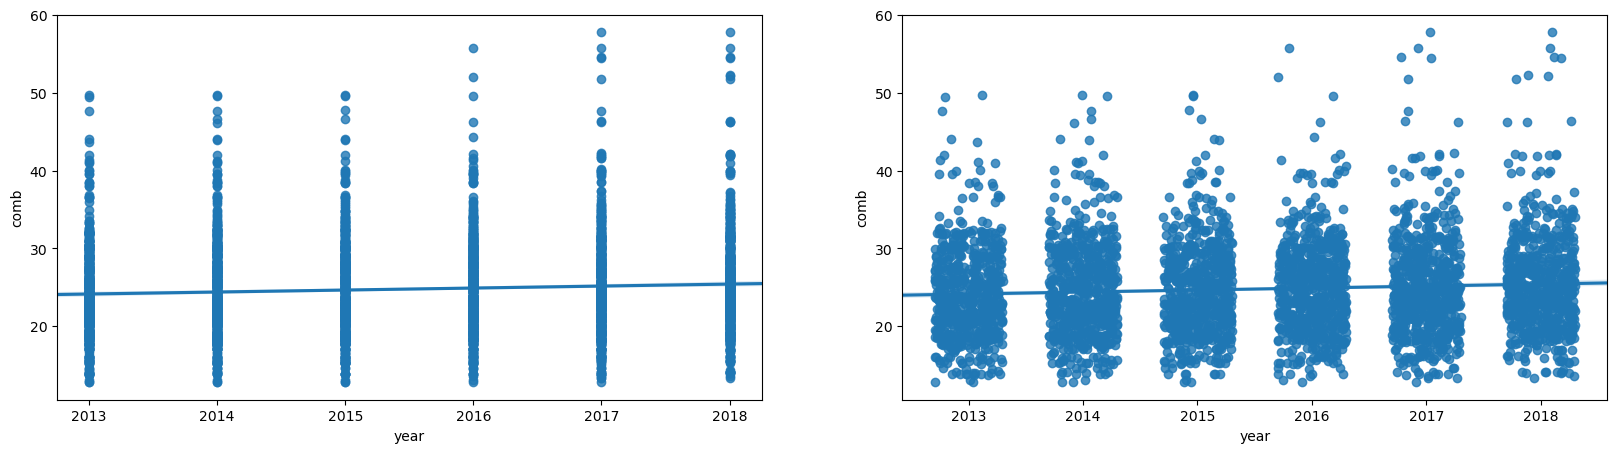

In [5]:
fuel_econ = pd.read_csv('Data/fuel-econ.csv')
fuel_econ.head(10)

##########################################
# Resize figure to accommodate two plots
plt.figure(figsize = [20, 5])

# PLOT ON LEFT - SIMPLE SCATTER
plt.subplot(1, 2, 1)
sns.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False);

##########################################
# PLOT ON RIGHT - SCATTER PLOT WITH JITTER
plt.subplot(1, 2, 2)

# In the sb.regplot() function below, the `truncate` argument accepts a boolean.
# If truncate=True, the regression line is bounded by the data limits. 
# Else if truncate=False, it extends to the x axis limits.
# The x_jitter will make each x value will be adjusted randomly by +/-0.3
sns.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3);

## Plot with both Jitter and Transparency
* You can add transparency to either **scatter()** or **regplot()** by adding the "alpha" parameter set to a value between 0 (fully transparent, not visible) and 1 (fully opaque). 

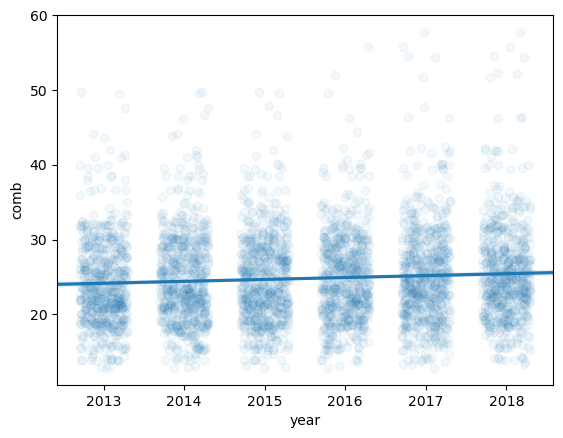

In [6]:
# The scatter_kws helps specifying the opaqueness of the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 
sns.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});

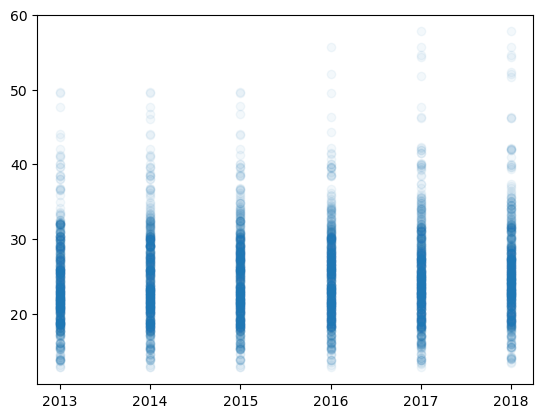

In [7]:
# Alternative way to plot with the transparency.
# The scatter() function below does NOT have any argument to specify the Jitter
plt.scatter(data = fuel_econ, x = 'year', y = 'comb', alpha=1/20);

## Heat Maps
* Heat maps are useful in the following cases:

**1**-to represent a plot for discrete vs. another discrete variable
**2**-As an alternative to transparency when the data points are enormous

### Default heat plot using Matplotlib.pyplot.hist2d() function

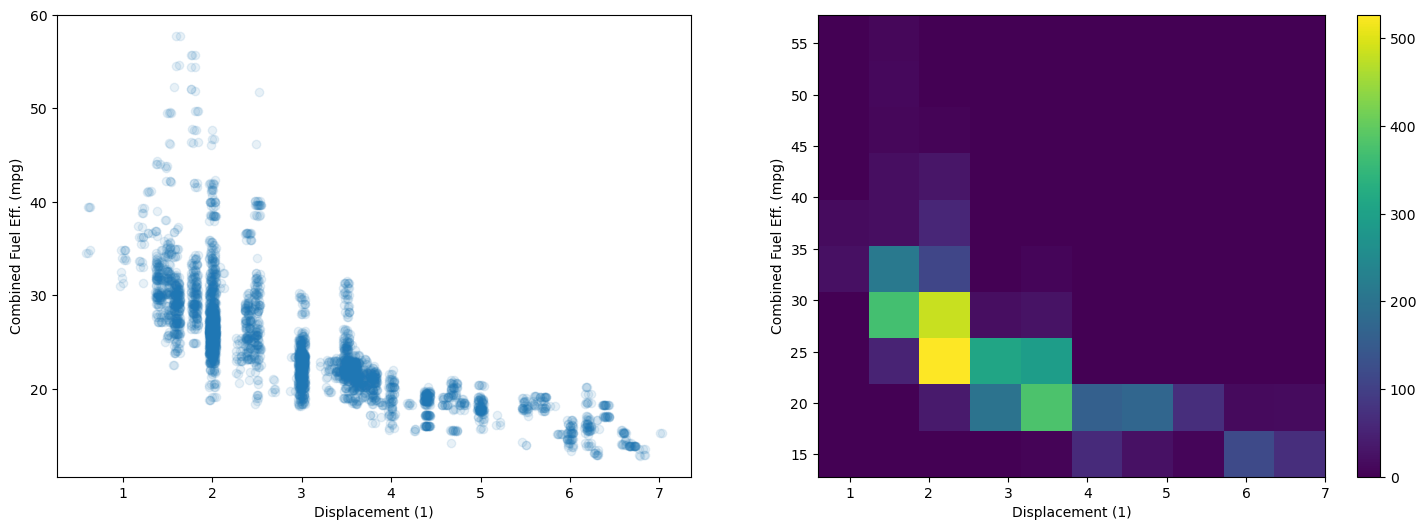

In [8]:
# Read the CSV file
fuel_econ = pd.read_csv('Data/fuel-econ.csv')
fuel_econ.head(10)


plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sns.regplot(data = fuel_econ, x = 'displ', y = 'comb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

## Heat plot - Set a minimum bound on counts and a reverse color map

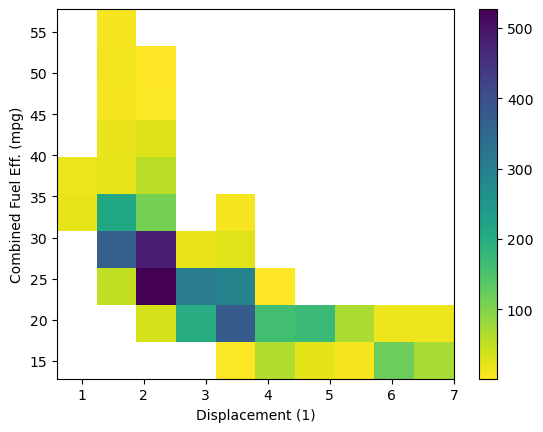

In [9]:
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
#  By adding a cmin = 0.5 parameter to the hist2d call, this means that a cell will only get colored if it contains
# at least one point.
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

## Heat plot - Specify bin edges

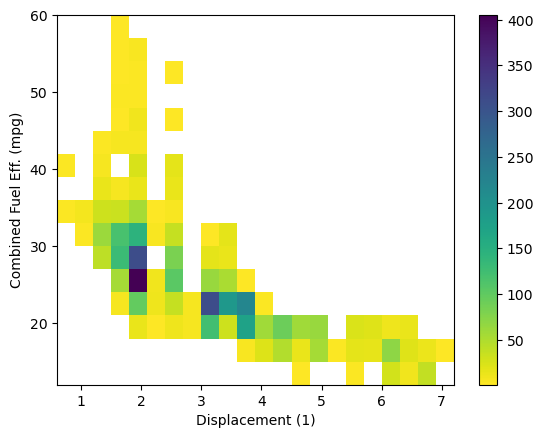

In [10]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
 
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Notice the areas of high frequency in the middle of the negative trend in the plot.

## Add text annotation on each cell using pyplot.text() function

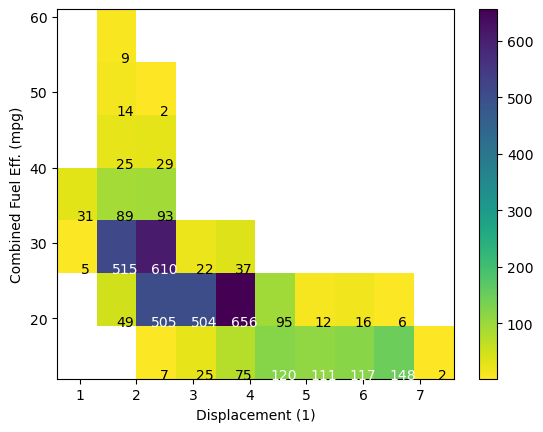

In [11]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

## Violin Plots
* There are a few ways of plotting the relationship between one **quantitative** and one **qualitative** variable, that demonstrate the data at different levels of abstraction

### Violin plot for plotting a Quantitative variable (fuel efficiency) versus Qualitative variable (vehicle class)

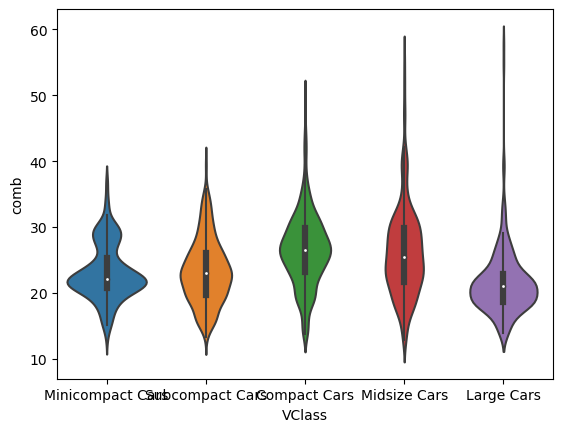

In [12]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

sns.violinplot(data=fuel_econ, x='VClass', y='comb');

In [13]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### Violin plot without datapoints in the violin interior

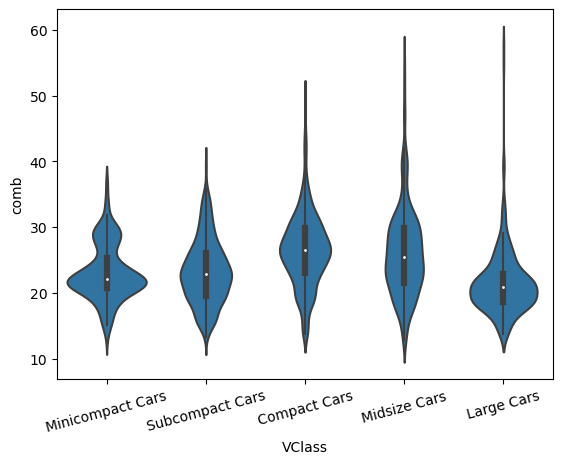

In [14]:
base_color = sns.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sns.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, innner=None)
plt.xticks(rotation=15);

### render violin with horizontal bars

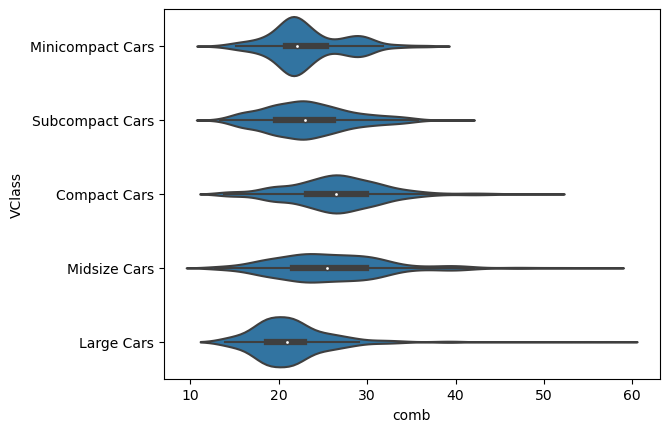

In [15]:
sns.violinplot(data=fuel_econ, y='VClass', x='comb', color=base_color, innner=None);

## Box Plots 

* A **box** plot is another way of showing the relationship between a **numeric variable** and a **categorical variable**. Compared to the violin plot, the box plot leans more on the summarization of the data, primarily just reporting a set of descriptive statistics for the numeric values on each categorical level

### Violin versus Box plot

(6.966470319355814, 63.09321945242605)

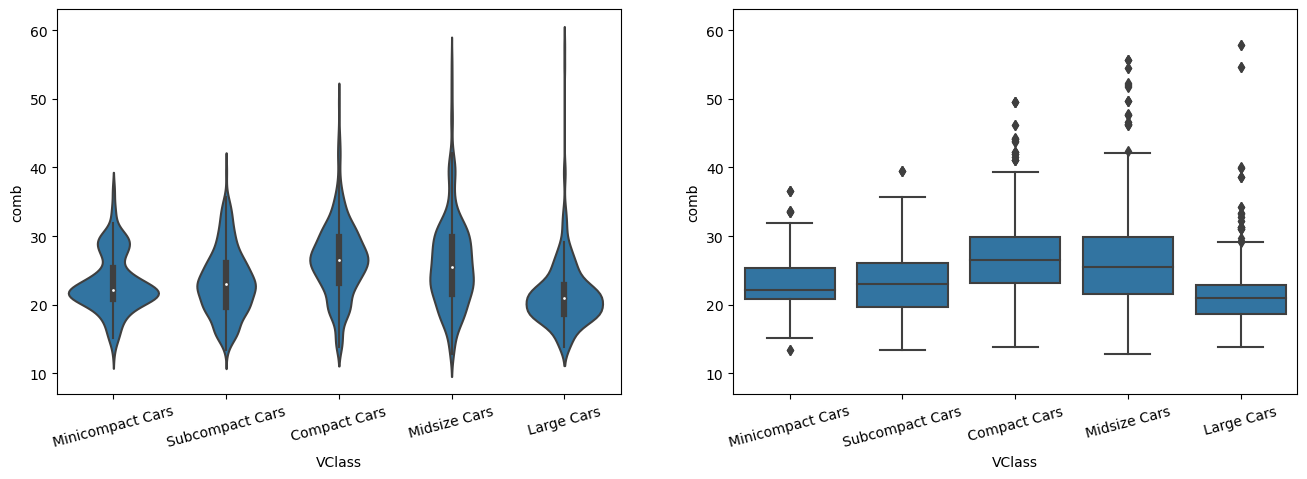

In [16]:
# Step 1. Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# allows plots to be rendered directly inside the notebook
%matplotlib inline

# Step 2. Load data
fuel_econ = pd.read_csv('Data/fuel-econ.csv')
fuel_econ.head(10)
# Step 3. Convert the "VClass" column from a plain object type into an ordered categorical type 
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

# Step 4.  TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5])
base_color = sns.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sns.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, innner='quartile')
plt.xticks(rotation=15);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

### Horizontal box plot

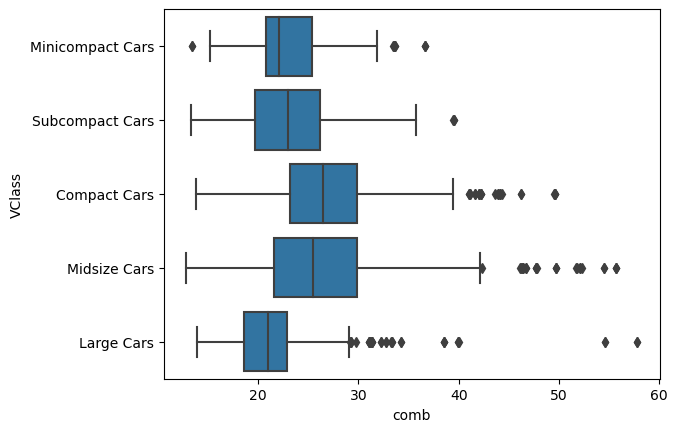

In [17]:
sns.boxplot(data=fuel_econ, y='VClass', x='comb', color=base_color);

### Violin plot with quartile information in the middle

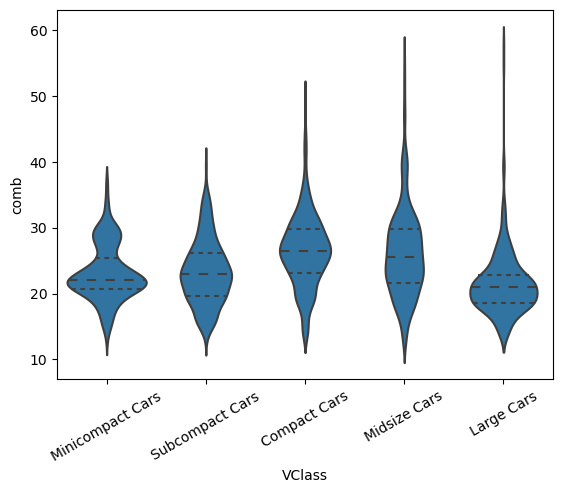

In [18]:
base_color = sns.color_palette()[0]
sns.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner='quartile')
plt.xticks(rotation=30);

### Difference between the two main fuel types
* investigate the difference between the two main fuel types found in the 'fuelType' variable: Regular Gasoline and Premium Gasoline

In [25]:
fuel_econ = pd.read_csv('Data/fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [28]:
fuel_econ = fuel_econ[(fuel_econ['fuelType']=='Regular Gasoline') | (fuel_econ['fuelType']=='Premium Gasoline')]

In [30]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

In [ ]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])

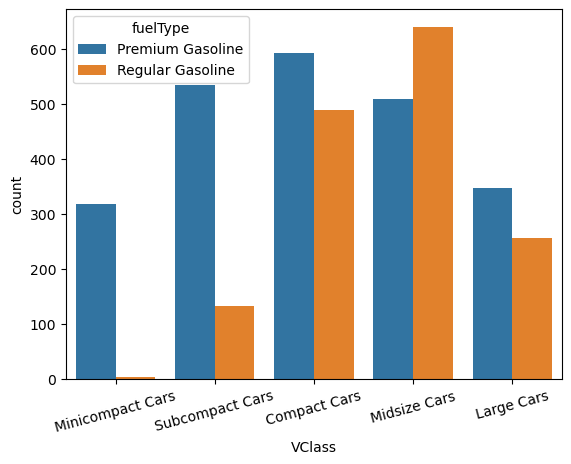

In [31]:
sns.countplot(data = fuel_econ, x = 'VClass', hue = 'fuelType')
plt.xticks(rotation=15);

In [33]:
fuel_econ = pd.read_csv('Data/fuel-econ.csv')

# Convert the "VClass" column from a plain object type into an ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

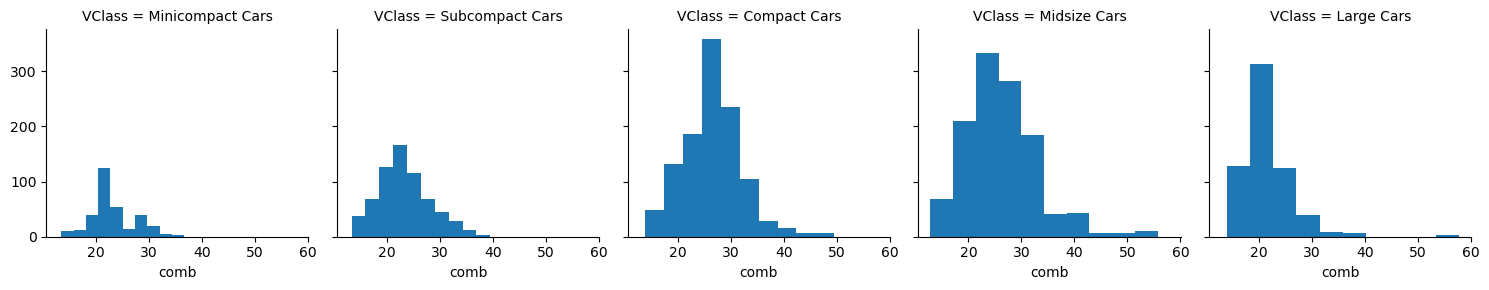

In [34]:
g = sns.FacetGrid(data = fuel_econ, col = 'VClass')
g.map(plt.hist, "comb")

In [42]:
lar = fuel_econ[fuel_econ['VClass'] =='Large Cars']
lar

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
12,32219,Lincoln,MKS AWD,2013,Large Cars,All-Wheel Drive,Automatic (S6),Regular Gasoline,6,3.7,0,105,18.0431,22.6000,25.9987,36.7000,20.9244,424,5,5
13,32220,Lincoln,MKS AWD,2013,Large Cars,All-Wheel Drive,Automatic (S6),Regular Gasoline,6,3.5,0,105,17.1523,21.4000,25.0000,35.6000,20.0543,446,5,5
14,32221,Lincoln,MKS FWD,2013,Large Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,6,3.7,0,105,17.9906,22.5290,26.5429,37.5393,21.0415,422,5,5
16,32232,Ford,Taurus AWD,2013,Large Cars,All-Wheel Drive,Automatic (S6),Regular Gasoline,6,3.5,0,102,18.1170,22.7000,25.5432,36.0000,20.8440,426,5,5
17,32233,Ford,Taurus AWD,2013,Large Cars,All-Wheel Drive,Automatic (S6),Regular Gasoline,6,3.5,0,102,17.1523,21.4000,25.0000,35.6000,20.0543,446,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3890,39755,Honda,Accord,2018,Large Cars,Front-Wheel Drive,Automatic (S10),Regular Gasoline,4,2.0,0,106,22.9620,29.4000,34.0000,50.2000,27.0324,330,6,6
3891,39756,Kia,K900,2018,Large Cars,Rear-Wheel Drive,Automatic (S8),Premium Gasoline,8,5.0,0,110,14.8479,18.3390,22.6577,31.6162,17.5737,512,3,3
3892,39757,Kia,K900,2018,Large Cars,Rear-Wheel Drive,Automatic (S8),Regular Gasoline,6,3.8,0,110,17.0031,21.2000,25.3476,35.7000,19.9600,448,4,4
3893,39758,Kia,Cadenza,2018,Large Cars,Front-Wheel Drive,Automatic (S8),Regular Gasoline,6,3.3,0,108,20.3289,25.7228,27.5829,39.1521,23.0577,383,5,5


In [43]:
lar.describe()

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
count,625.000000,625.000000,625.000000,625.000000,625.0,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000
mean,36209.979200,2015.633600,6.604800,3.742400,0.0,97.329600,18.557041,23.440547,26.947652,38.063278,21.519717,428.710400,4.656000,4.665600
std,2203.092331,1.705522,2.018895,1.333762,0.0,32.325223,5.161034,7.193363,4.776459,7.267411,5.000261,82.530497,1.449492,1.484487
min,32219.000000,2013.000000,4.000000,1.500000,0.0,0.000000,11.485000,13.900000,18.300800,25.159700,13.863400,154.000000,1.000000,1.000000
25%,34295.000000,2014.000000,6.000000,3.000000,0.0,105.000000,15.732000,19.554900,23.838800,33.400000,18.627700,389.000000,4.000000,4.000000
50%,36321.000000,2016.000000,6.000000,3.600000,0.0,106.000000,17.938400,22.449000,26.374900,37.279800,20.978200,423.000000,5.000000,5.000000
75%,38258.000000,2017.000000,8.000000,4.700000,0.0,110.000000,19.658300,25.000000,29.147100,41.400000,22.837700,478.000000,5.000000,5.000000
max,39822.000000,2018.000000,12.000000,6.700000,0.0,127.000000,56.510500,75.700000,59.416900,79.100000,57.782400,638.000000,10.000000,10.000000


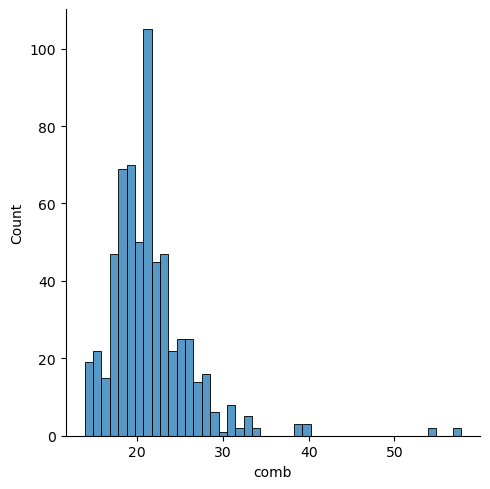

In [45]:
sns.displot(lar['comb'])

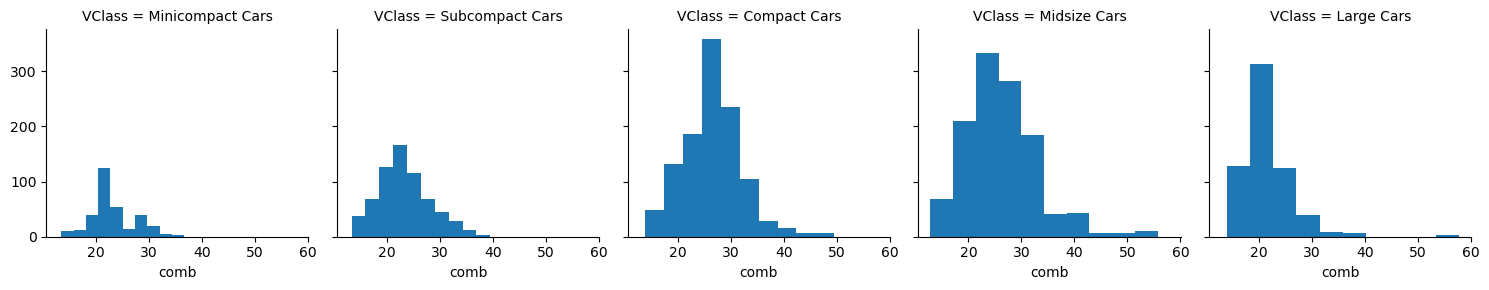

In [48]:
# compare the subplot of Large Cars with distplot
g = sns.FacetGrid(data = fuel_econ, col = 'VClass')
g.map(plt.hist, "comb")

### Use bins

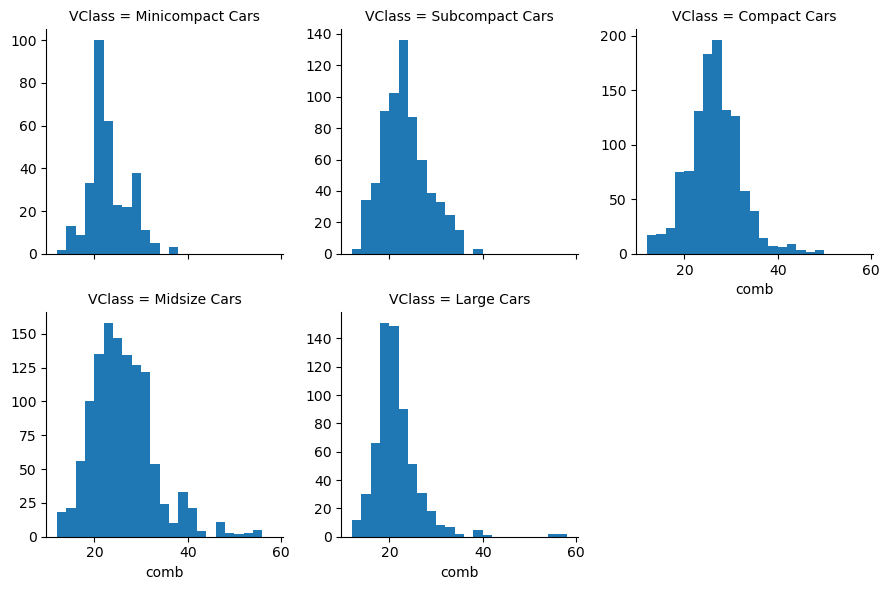

In [51]:
bin_edges = np.arange(12, 58+2, 2)

# Try experimenting with dynamic bin edges
# bin_edges = np.arange(-3, fuel_econ['comb'].max()+1/3, 1/3)

g = sns.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap=3, sharey=False)
g.map(plt.hist, 'comb', bins = bin_edges);

* If you have many categorical levels to plot, then you might want to add more arguments to the FacetGrid object's initialization to facilitate clarity in the conveyance of information. The example below includes a categorical variable, "trans", that has 27 different transmission types. Setting col_wrap = 7 means that the plots will be organized into rows of 7 facets each, rather than a single long row of 27 plots.Also, we want to have the facets for each transmission type in the decreasing order of combined fuel efficiency.

In [59]:
# Find the order in which you want to display the Facets
# For each transmission type, find the combined fuel efficiency
# mean of comb for each trans type
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()
group_means

,comb
trans,
Automatic (A1),34.677929
Automatic (AM-S6),27.770877
Automatic (AM-S7),21.572946
Automatic (AM-S8),24.119489
Automatic (AM6),33.194893
Automatic (AM7),23.690389
Automatic (AM8),28.364450
Automatic (AV-S10),27.918867
Automatic (AV-S6),31.246947


In [60]:
# Select only the list of transmission type in the decreasing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending = False).index
group_order

Index(['Automatic (variable gear ratios)', 'Automatic (A1)', 'Automatic (AM6)',
       'Automatic (AV-S6)', 'Automatic (AV-S7)', 'Manual 5-spd',
       'Automatic 4-spd', 'Automatic (AM8)', 'Automatic (AV-S10)',
       'Automatic (AM-S6)', 'Automatic (AV-S8)', 'Manual 6-spd',
       'Automatic (S6)', 'Automatic 6-spd', 'Automatic (S5)', 'Automatic (S9)',
       'Automatic (AM-S8)', 'Automatic (AM7)', 'Automatic 9-spd',
       'Automatic (S7)', 'Automatic (S8)', 'Manual 7-spd', 'Automatic (AM-S7)',
       'Automatic (S10)', 'Automatic 7-spd', 'Automatic 8-spd',
       'Automatic 5-spd'],
      dtype='object', name='trans')

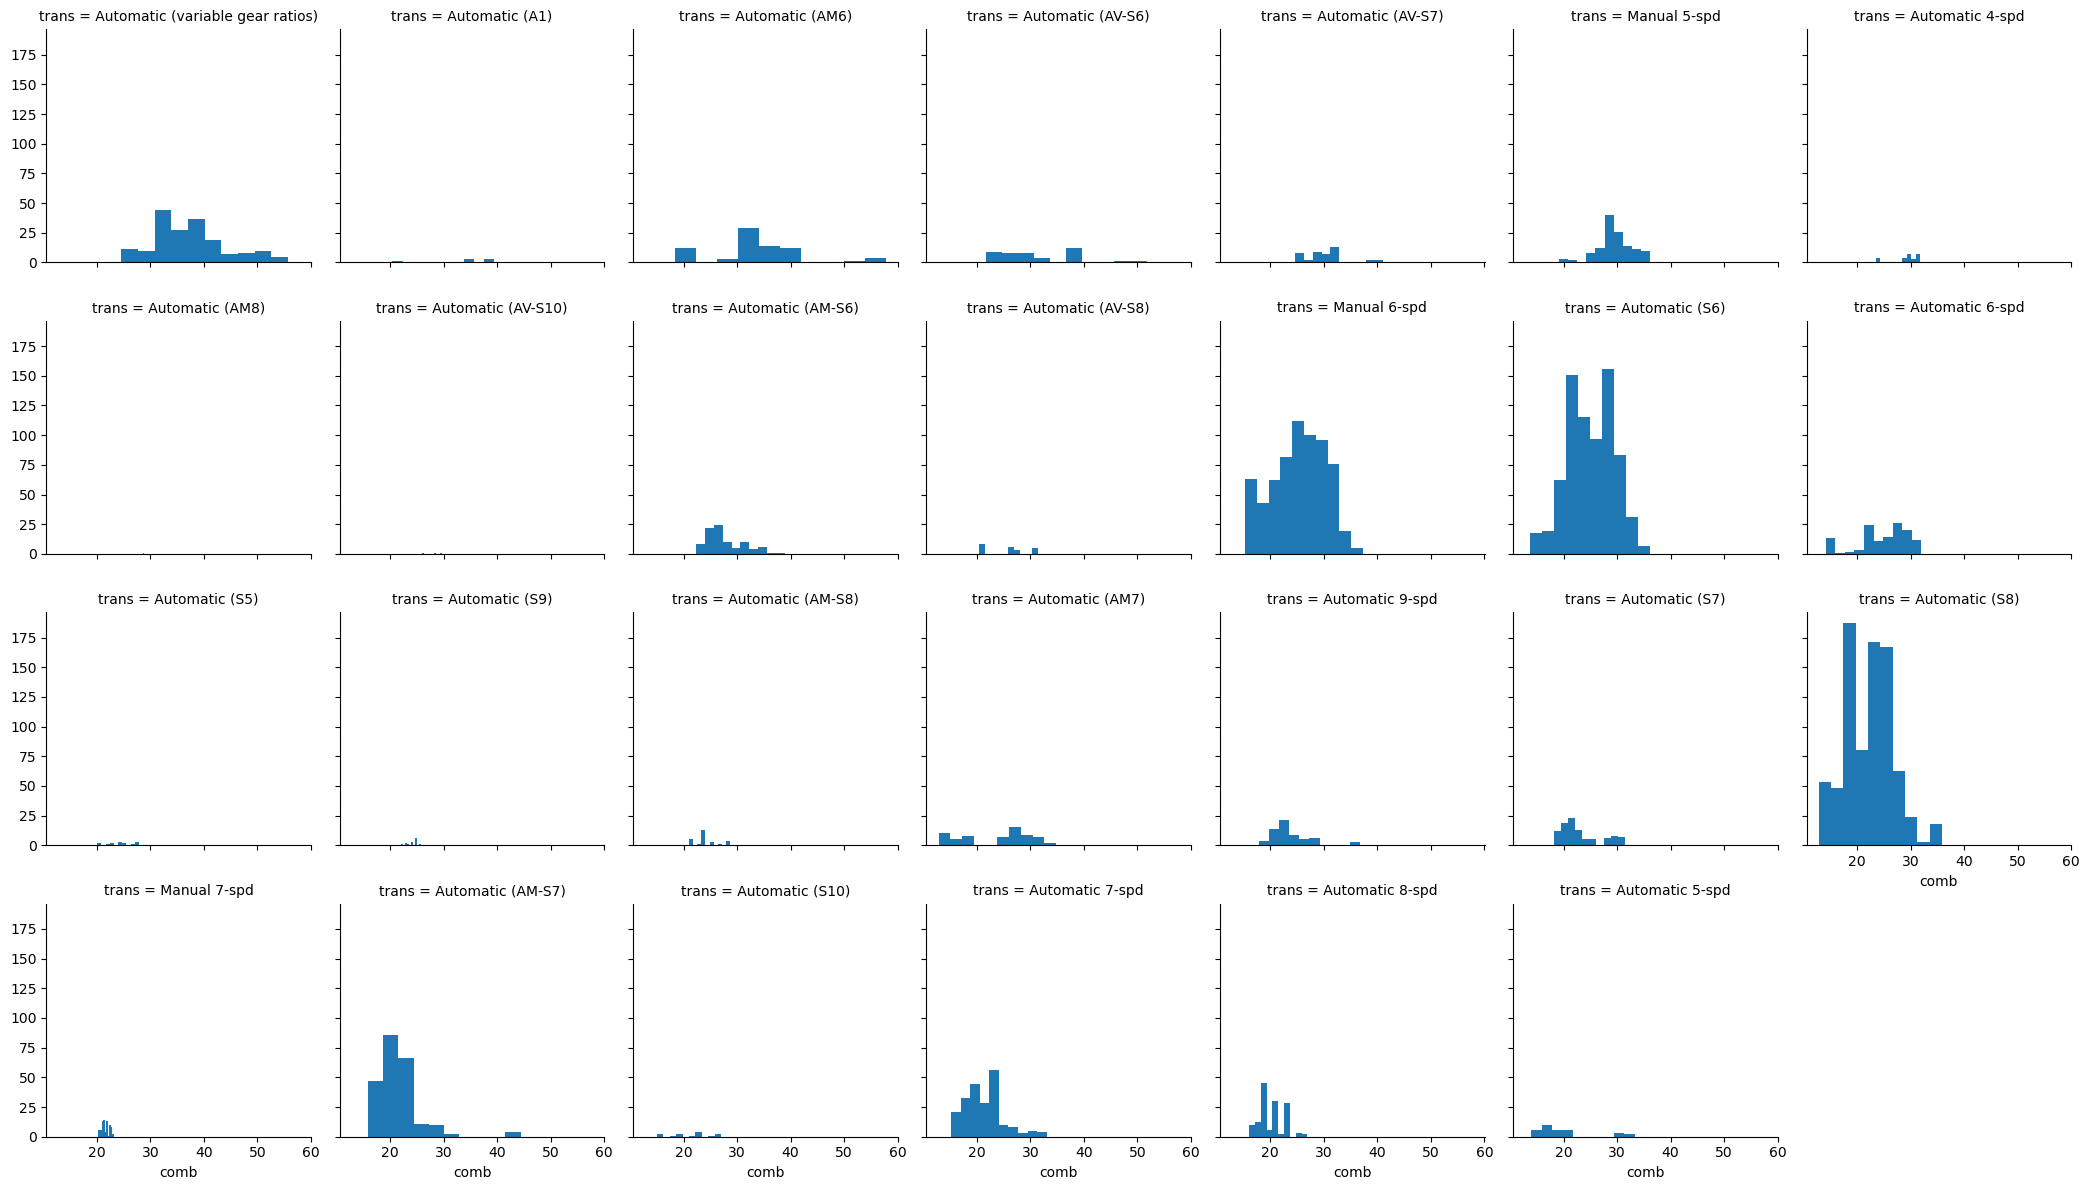

In [61]:
#  Use the argument col_order to display the FacetGrid in the desirable group_order
g = sns.FacetGrid(data = fuel_econ, col = 'trans', col_wrap = 7, col_order = group_order)
g.map(plt.hist, 'comb')